In [2]:
%matplotlib notebook
import os
import pandas as pd 
import math
import numpy as np 
import matplotlib.pyplot as plt
import random as r 
import glob

In [3]:
simfilepath = "/nBodyData/mathSim/batch3*"
alf = [i for i in glob.glob(simfilepath)]
sdf = pd.concat([pd.read_csv(f) for f in alf],sort=False)

# nnfile = "/nBodyData/pred/predicted_paths_3_combined.csv"
nnfile = "/nBodyData/pred/predicted_paths_batch_3_1.csv"
dataCols = ["x1tEnd_p", "x2tEnd_p", "x3tEnd_p", "y1tEnd_p", "y2tEnd_p", "y3tEnd_p","eventID"]
pdf = pd.read_csv(nnfile, names=dataCols)
# pdf['eventID'] = pdf['eventID'] + (3*(10**9) + 10**8)

In [4]:
# combine dataframes
pdf.eventID = pdf.eventID.astype(int)
pdf.sort_values(["eventID"], axis=0, ascending=True, inplace= True) 

adf = pd.merge(left=sdf,right=pdf, on='eventID')
mdf = adf.drop_duplicates(subset='eventID')

In [13]:
# pick event to plot
r.seed(1)
indexArray = np.array(mdf['eventID'])
indexArray = np.unique((indexArray/10000).astype(int))
index = np.random.choice(indexArray)*10000
print(index)

3100440000


<IPython.core.display.Javascript object>


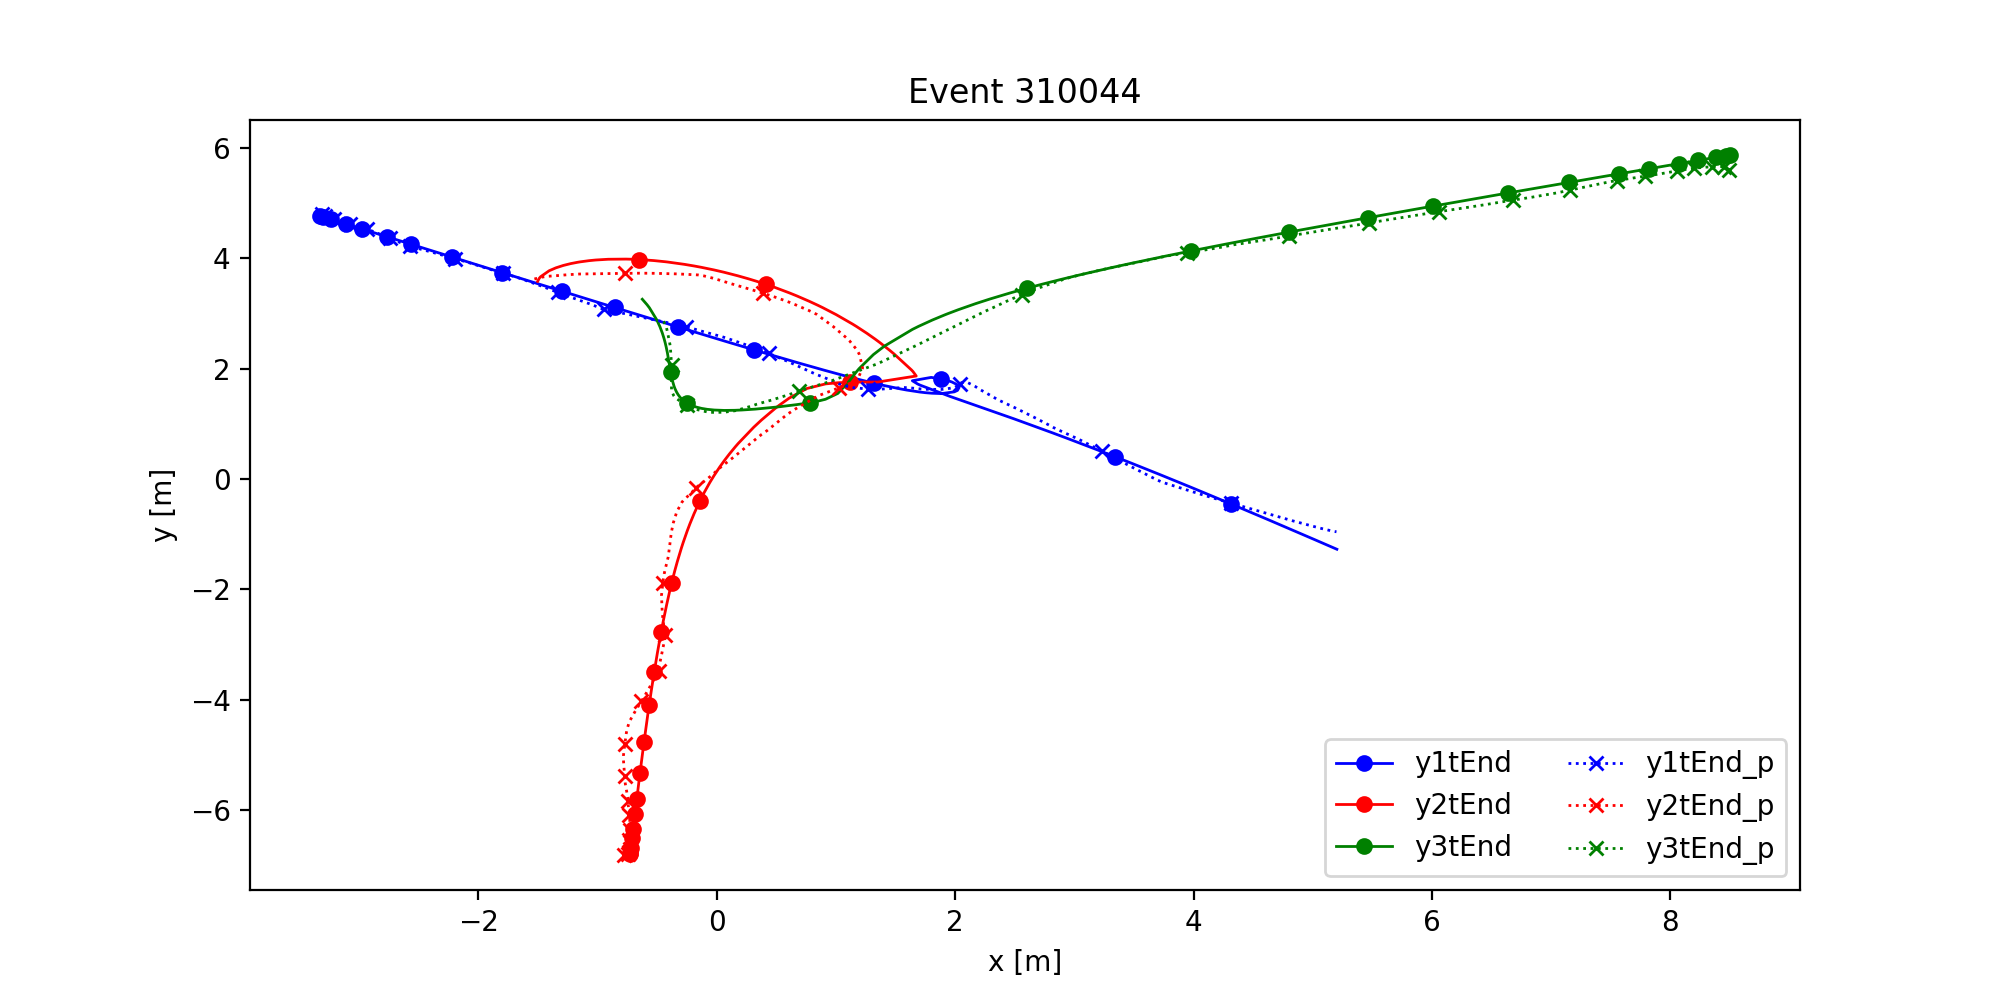

In [14]:
# plot event 
edf = mdf.loc[(mdf['eventID'] >= index) & (mdf['eventID'] <= (index+2560))]
fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = (10,5)

tsize = 5
ax.plot('x1tEnd', 'y1tEnd', data=edf, color='blue', marker='o',linewidth=1, markersize=tsize, markevery=30)
ax.plot('x2tEnd', 'y2tEnd', data=edf, color='red', marker='o',linewidth=1, markersize=tsize, markevery=30)
ax.plot('x3tEnd', 'y3tEnd', data=edf, color='green', marker='o',linewidth=1, markersize=tsize, markevery=30)

ax.plot('x1tEnd_p', 'y1tEnd_p', data=edf, color='blue', marker='x', linestyle=':', linewidth=1, markersize=tsize, markevery=30)
ax.plot('x2tEnd_p', 'y2tEnd_p', data=edf, color='red', marker='x', linestyle=':', linewidth=1, markersize=tsize, markevery=30)
ax.plot('x3tEnd_p', 'y3tEnd_p', data=edf, color='green', marker='x', linestyle=':', linewidth=1, markersize=tsize, markevery=30)

plt.legend(loc='best', ncol=2, fancybox=True)
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.title('Event {0}'.format(int(index/10000)))
plt.show()